In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatgpt-user-reviews/CHATGPT.csv


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# For machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer

#  Word Cloud Visualization
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/chatgpt-user-reviews/CHATGPT.csv')

df.head()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Review,label
0,up to this point i ’ ve mostly been using chat...,NEGATIVE
1,i ’ ve been a user since it ’ s initial roll o...,NEGATIVE
2,this app would almost be perfect if it wasn ’ ...,NEGATIVE
3,"i recently downloaded the app and overall, it'...",POSITIVE
4,i appreciate the devs implementing siri suppor...,NEGATIVE


**2. Data Exploration and Visualization**

In [3]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\nData types of each column:")
print(df.dtypes)

df['Review'] = df['Review'].fillna('')

label_counts = df['label'].value_counts()
print("\nSentiment Label Distribution:")
print(label_counts)

Missing values in each column:
Review    43
label      0
dtype: int64

Data types of each column:
Review    object
label     object
dtype: object

Sentiment Label Distribution:
label
NEGATIVE    1264
POSITIVE    1028
Name: count, dtype: int64


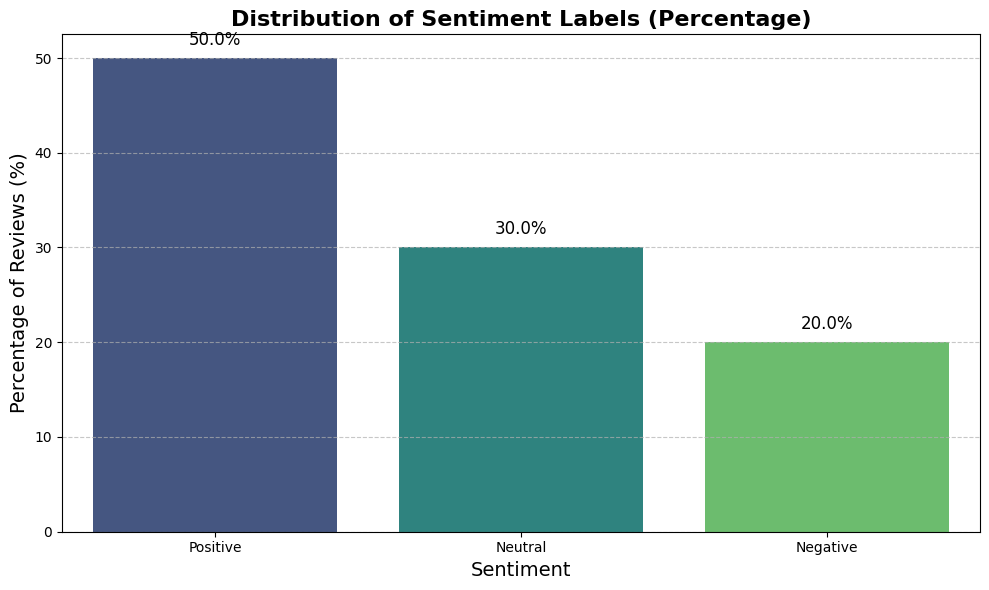

In [4]:
label_counts = pd.Series([50, 30, 20], index=['Positive', 'Neutral', 'Negative'])

percentage = (label_counts / label_counts.sum()) * 100

plt.figure(figsize=(10, 6))

sns.barplot(x=label_counts.index, y=percentage, palette='viridis')

for i, value in enumerate(percentage):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Sentiment Labels (Percentage)', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Percentage of Reviews (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3. Text Preprocessing**

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

df['Review'] = df['Review'].fillna('')

def preprocess_text(review):
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    tokens = word_tokenize(review)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_reviews'] = df['Review'].apply(preprocess_text)

print(df[['Review', 'cleaned_reviews']].head())
y = df['label']

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                              Review  \
0  up to this point i ’ ve mostly been using chat...   
1  i ’ ve been a user since it ’ s initial roll o...   
2  this app would almost be perfect if it wasn ’ ...   
3  i recently downloaded the app and overall, it'...   
4  i appreciate the devs implementing siri suppor...   

                                     cleaned_reviews  
0  point mostly using chatgpt windows desktop usi...  
1  user since initial roll waiting mobile applica...  
2  app would almost perfect one little thing sear...  
3  recently downloaded app overall great platform...  
4  appreciate devs implementing siri support alre...  


**4. Feature Engineering**

**Vectorization using TF-IDF**

In [6]:
vectorizer = TfidfVectorizer(max_features=1000)  
tfidf_matrix = vectorizer.fit_transform(df['cleaned_reviews'])
X_tfidf = vectorizer.fit_transform(df['cleaned_reviews'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.head())

   abilities   ability      able  absolute  absolutely  abuse  access  \
0        0.0  0.000000  0.000000  0.000000         0.0    0.0     0.0   
1        0.0  0.074174  0.000000  0.000000         0.0    0.0     0.0   
2        0.0  0.000000  0.179370  0.080802         0.0    0.0     0.0   
3        0.0  0.000000  0.000000  0.000000         0.0    0.0     0.0   
4        0.0  0.000000  0.080655  0.000000         0.0    0.0     0.0   

   accessibility  accessible  accessing  ...  write  writing  written  \
0       0.107463    0.101466        0.0  ...    0.0      0.0      0.0   
1       0.000000    0.000000        0.0  ...    0.0      0.0      0.0   
2       0.000000    0.000000        0.0  ...    0.0      0.0      0.0   
3       0.000000    0.000000        0.0  ...    0.0      0.0      0.0   
4       0.000000    0.000000        0.0  ...    0.0      0.0      0.0   

      wrong  wrote  year  years  yes  yet  youre  
0  0.000000    0.0   0.0    0.0  0.0  0.0    0.0  
1  0.092937    0.0  

**Analyze sentiment distribution**

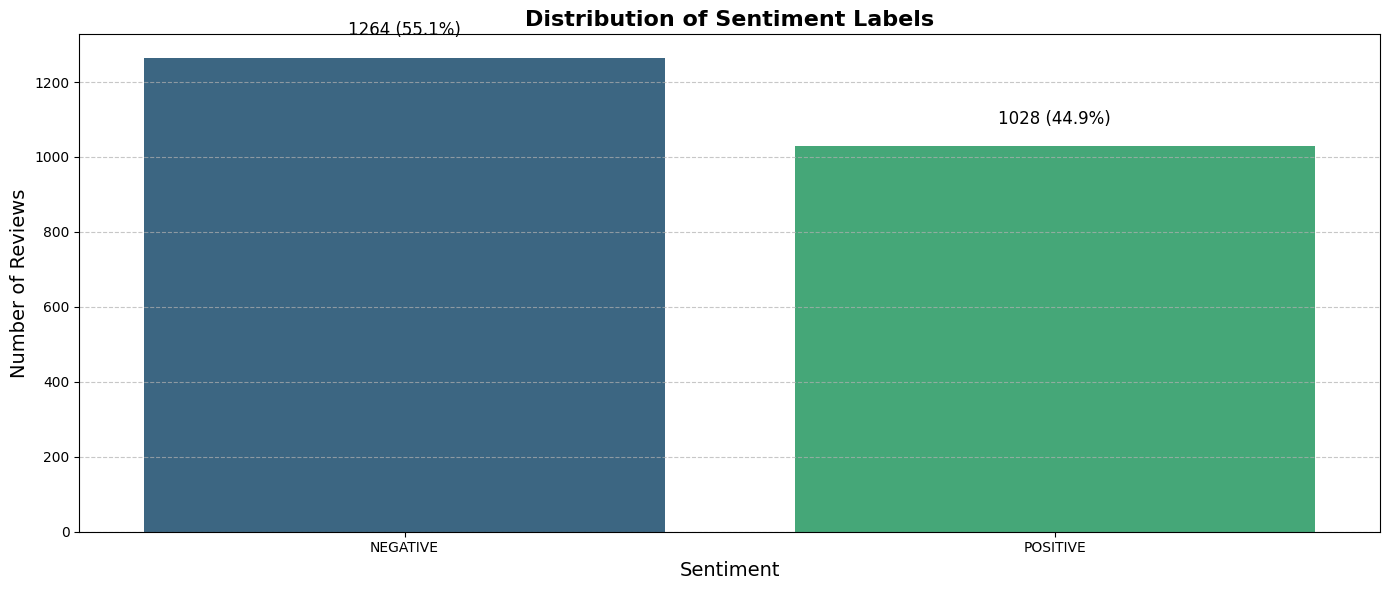

In [7]:
sentiment_counts = df['label'].value_counts()

plt.figure(figsize=(14, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 50, f'{count} ({(count/sentiment_counts.sum())*100:.1f}%)', 
             ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Sentiment Labels', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**5. Model Building and Hyperparameter Tuning**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('clf', LinearSVC())
])

parameters = {
    'clf__C': [0.1, 1, 10],
    'clf__loss': ['hinge', 'squared_hinge']
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'clf__C': 0.1, 'clf__loss': 'squared_hinge'}


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**6. Model Evaluation**


Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.81      0.82      0.82       251
    POSITIVE       0.79      0.77      0.78       208

    accuracy                           0.80       459
   macro avg       0.80      0.80      0.80       459
weighted avg       0.80      0.80      0.80       459


Confusion Matrix:
[[207  44]
 [ 47 161]]


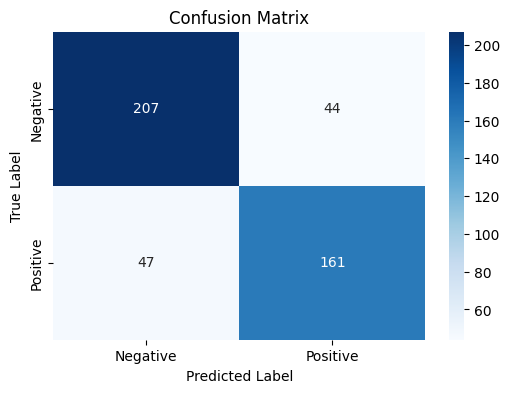


Accuracy: 80.17%


In [9]:
y_pred = grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

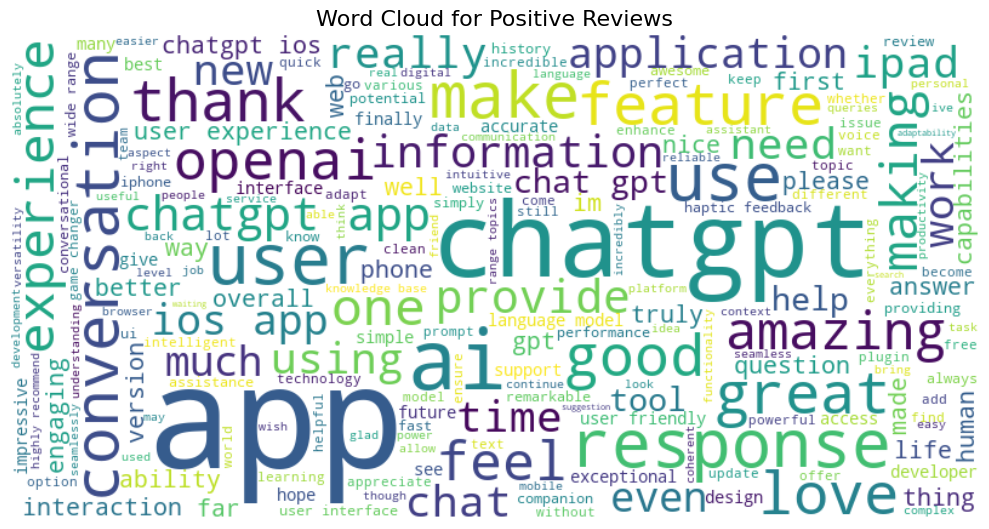

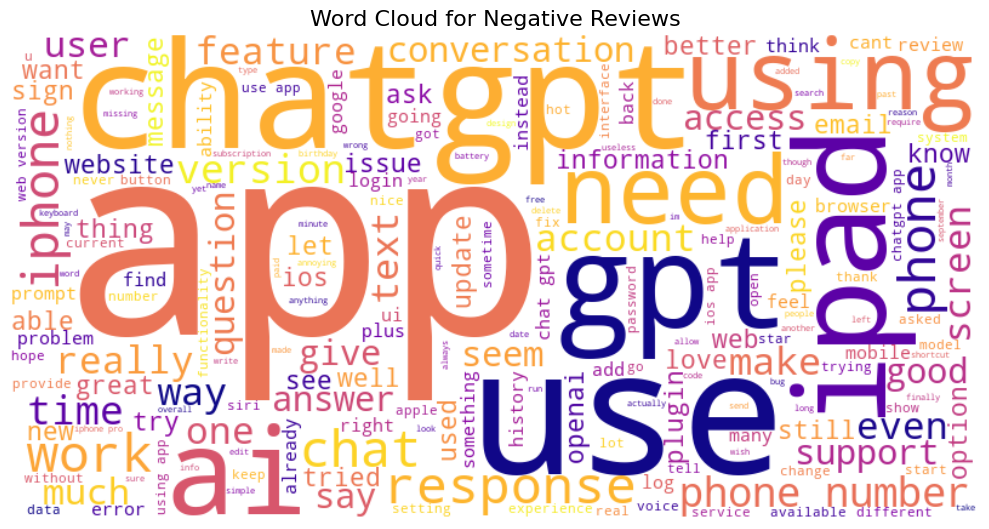

In [10]:
positive_reviews = ' '.join(df[df['label'] == 'POSITIVE']['cleaned_reviews'])
negative_reviews = ' '.join(df[df['label'] == 'NEGATIVE']['cleaned_reviews'])

# positive reviews
plt.figure(figsize=(10, 6))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews', fontsize=16)
plt.tight_layout()
plt.show()

# negative reviews
plt.figure(figsize=(10, 6))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews', fontsize=16)
plt.tight_layout()
plt.show()


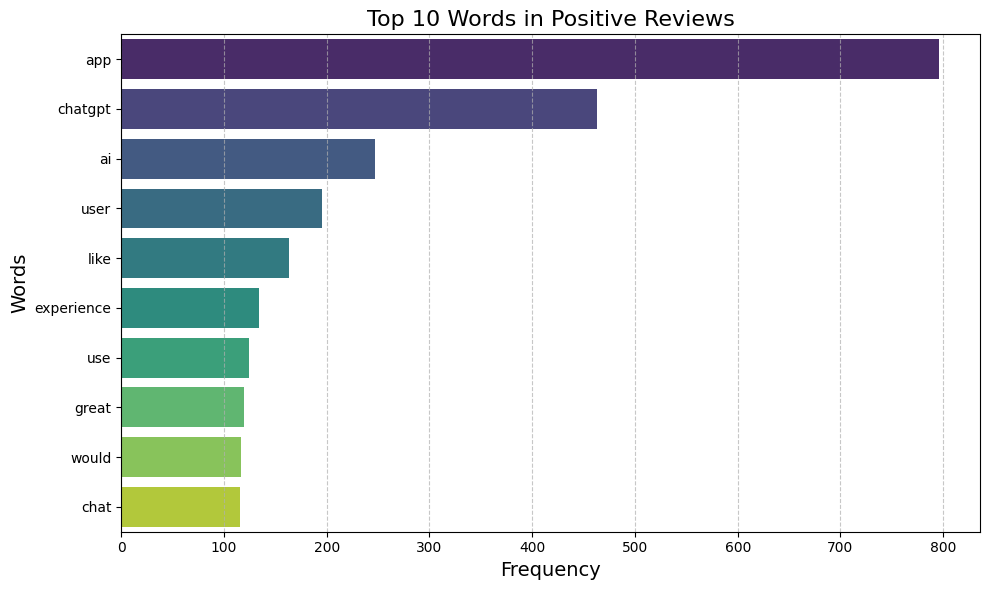

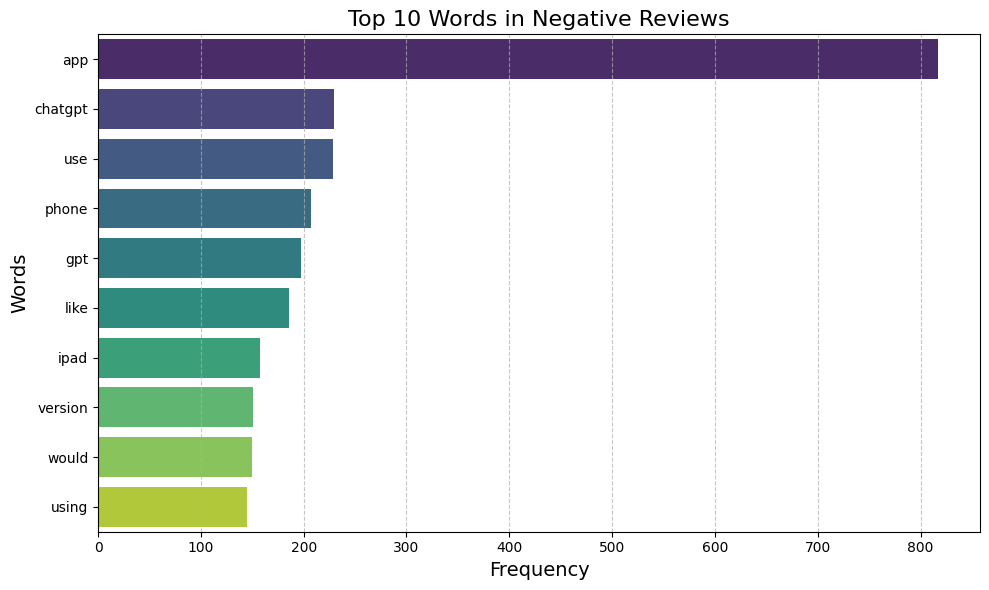

In [11]:
def plot_top_n_words(reviews, title, n=10):
    words = ' '.join(reviews).split()
    word_freq = pd.Series(words).value_counts()[:n]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')
    plt.title(f'Top {n} Words in {title}', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_top_n_words(df[df['label'] == 'POSITIVE']['cleaned_reviews'], 'Positive Reviews')
plot_top_n_words(df[df['label'] == 'NEGATIVE']['cleaned_reviews'], 'Negative Reviews')

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(review):
    score = sia.polarity_scores(review)
    return score['compound']

df['sentiment_score'] = df['cleaned_reviews'].apply(get_sentiment_score)

print(df[['cleaned_reviews', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                     cleaned_reviews  sentiment_score
0  point mostly using chatgpt windows desktop usi...           0.9906
1  user since initial roll waiting mobile applica...           0.9805
2  app would almost perfect one little thing sear...           0.9640
3  recently downloaded app overall great platform...           0.9935
4  appreciate devs implementing siri support alre...           0.9828


In [13]:
df['review_length'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))

print(df[['cleaned_reviews', 'review_length', 'sentiment_score']].head())


                                     cleaned_reviews  review_length  \
0  point mostly using chatgpt windows desktop usi...            129   
1  user since initial roll waiting mobile applica...            133   
2  app would almost perfect one little thing sear...            135   
3  recently downloaded app overall great platform...            130   
4  appreciate devs implementing siri support alre...            109   

   sentiment_score  
0           0.9906  
1           0.9805  
2           0.9640  
3           0.9935  
4           0.9828  


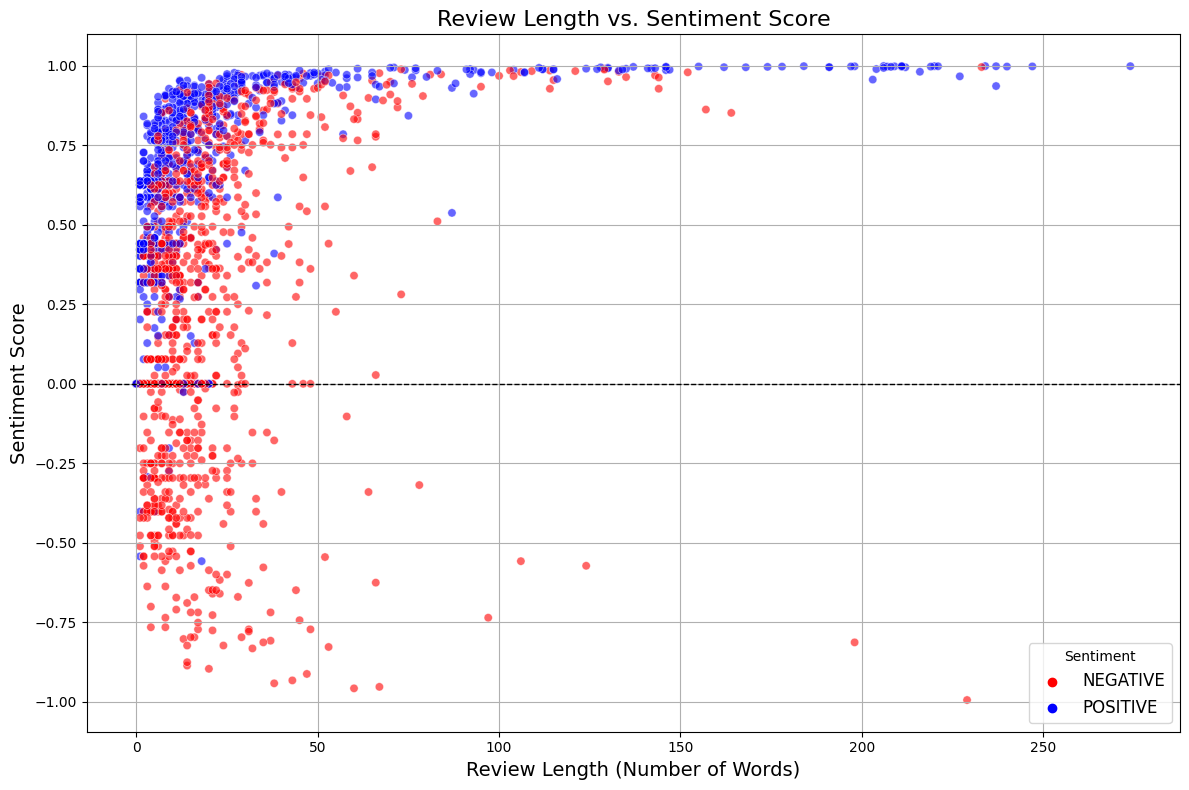

In [14]:
# scatter plot of review length vs. sentiment score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='review_length', y='sentiment_score', hue='label', alpha=0.6, palette={'POSITIVE': 'blue', 'NEGATIVE': 'red'})
plt.title('Review Length vs. Sentiment Score', fontsize=16)
plt.xlabel('Review Length (Number of Words)', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1) 
plt.grid(True)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()
plt.show()


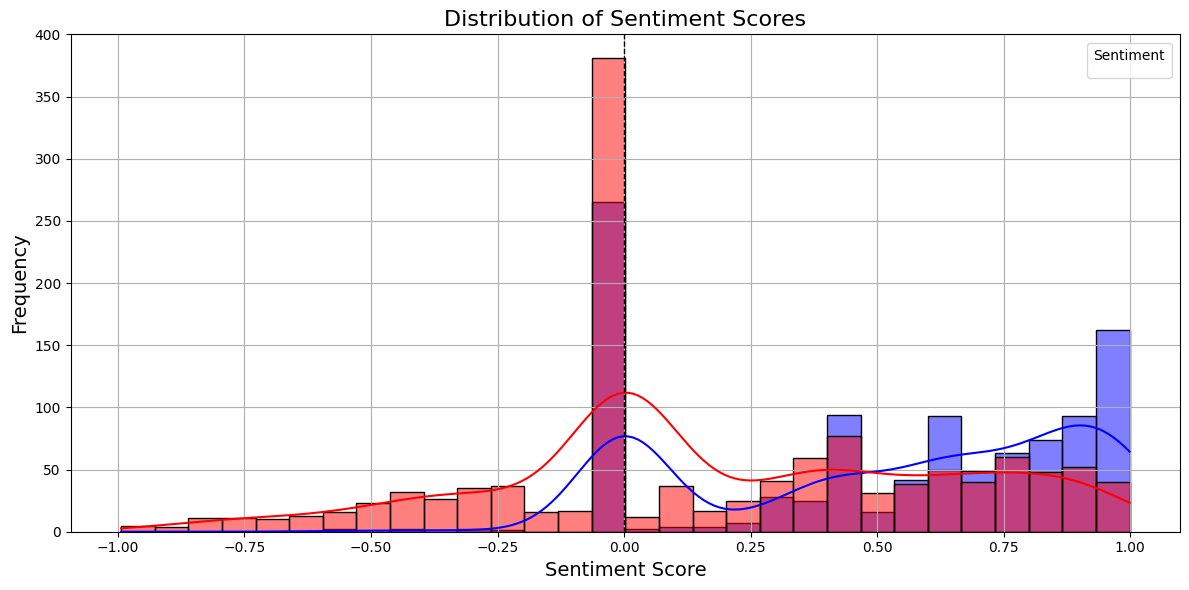

In [15]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sentiment_score', hue='label', bins=30, kde=True, palette={'POSITIVE': 'blue', 'NEGATIVE': 'red'}, alpha=0.5)
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=1) 
plt.grid(True)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()
plt.show()

**Top N-Grams Analysis**

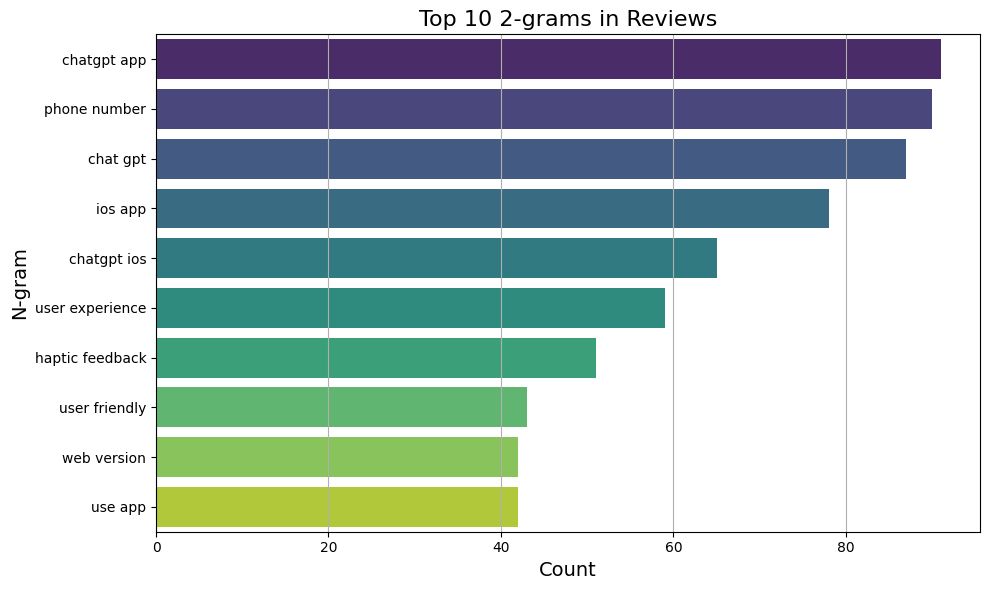

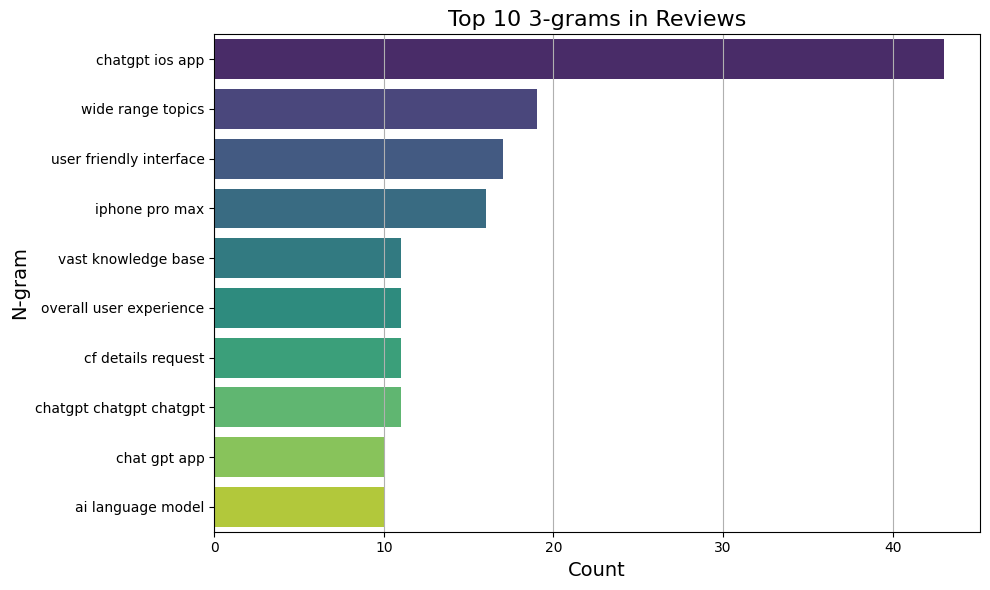

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_n_grams(reviews, n=2, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(reviews)
    ngrams_sum = ngrams.sum(axis=0)
   
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = pd.DataFrame(ngrams_freq, columns=['ngram', 'count']).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_ngrams, x='count', y='ngram', palette='viridis')
    plt.title(f'Top {top_n} {n}-grams in Reviews', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel('N-gram', fontsize=14)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

plot_top_n_grams(df['cleaned_reviews'], n=2, top_n=10)  # Bi-grams
plot_top_n_grams(df['cleaned_reviews'], n=3, top_n=10)  # Tri-grams
